In [108]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import numpy as np

### Dataset: VHM Historical Data

In [109]:
data = pd.read_csv('../Datasets/1 - VHM Historical Data.csv')
data = data.dropna()

data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')
data = data.set_index('Date')
data = data.sort_index()

# Format column "Price", "Open", "High", "Low"
for col in ['Price', 'Open', 'High', 'Low']:
    data[col] = data[col].str.replace(',', '').astype(float)

data
df = data


#### Ratio 7:3

In [110]:
train_size = round(len(df) * 0.7)
test_size = round(len(df) * 0.3) 

len(df), train_size, test_size

(1313, 919, 394)

In [111]:
train_data = df[:train_size]
test_data = df[train_size:]

train_data.shape, test_data.shape

((919, 6), (394, 6))

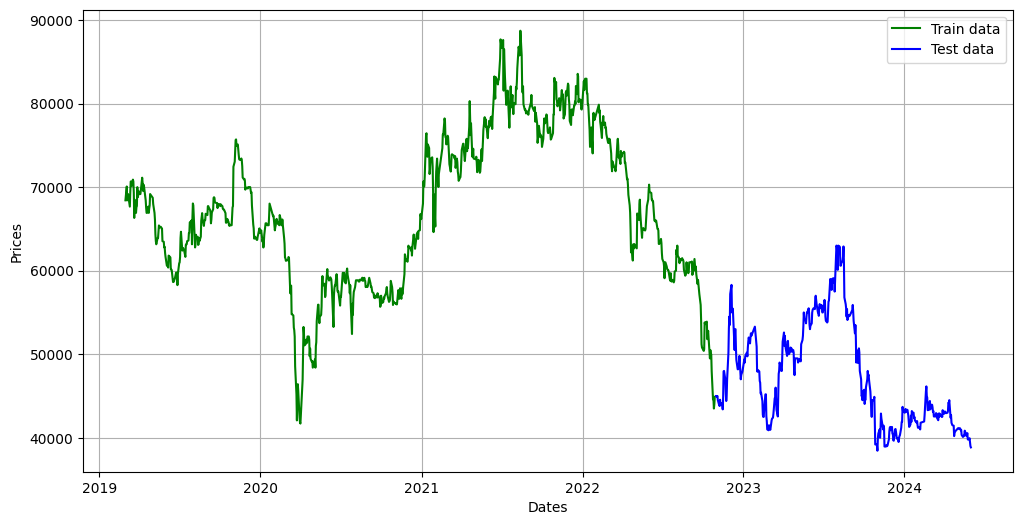

In [112]:
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(train_data['Price'], 'green', label='Train data')
plt.plot(test_data['Price'], 'blue', label='Test data')
plt.legend()

In [113]:
model = ExponentialSmoothing(train_data['Price'].values,trend='mul', seasonal='mul', seasonal_periods=4).fit()

c:\Users\minhc\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [114]:
predictions = model.forecast(test_size)
test_pred = predictions[:test_size]

In [115]:
test_data['Price Predicted'] = test_pred

C:\Users\minhc\AppData\Local\Temp\ipykernel_15796\2966731002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Price Predicted'] = test_pred


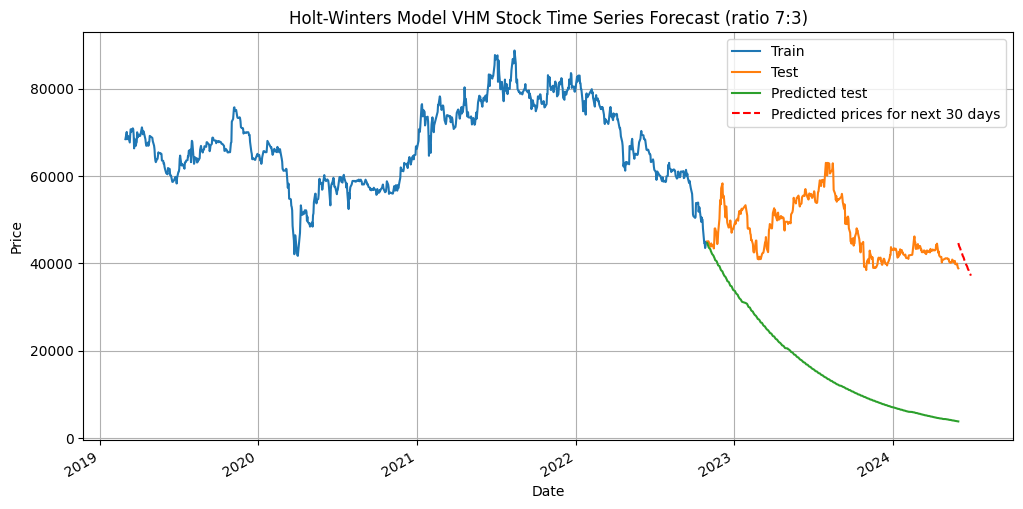

In [116]:
train_data['Price'].plot(legend=True, label='Train', figsize=(12,6))
test_data['Price'].plot(legend=True, label='Test')
test_data['Price Predicted'].plot(legend=True, label='Predicted test')

# Predict prices for the next 30 days
# Generate a range of dates for the next 30 days
next_30_days = pd.to_datetime(pd.date_range(start=data.index[-1], periods=30), format='%m/%d/%Y')

# Convert the date range to a NumPy array if needed for your prediction model
x_next_30_days = np.array(next_30_days).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.forecast(len(x_next_30_days))
plt.plot(next_30_days, y_next_30_days, linestyle='--', color='r', label='Predicted prices for next 30 days')
x_next_30_days

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Holt-Winters Model VHM Stock Time Series Forecast (ratio 7:3)')
plt.legend()
plt.grid(True)
plt.show()

In [117]:
# Calculate RMSE
test_rmse = np.sqrt(mean_squared_error(test_data['Price'], test_data['Price Predicted']))

# Calculate MAPE
test_mape = mean_absolute_percentage_error(test_data['Price'], test_data['Price Predicted'])

# Calculate MAE
test_mae = mean_absolute_error(test_data['Price'], test_data['Price Predicted'])

print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)


Testing RMSE: 32703.42372088813
Testing MAPE: 0.6553988909426699
Testing MAE: 30785.32745352567


#### Ratio 8:2

In [118]:
train_size = round(len(df) * 0.8)
test_size = round(len(df) * 0.2) 

len(df), train_size, test_size

(1313, 1050, 263)

In [119]:
train_data = df[:train_size]
test_data = df[train_size:]

train_data.shape, test_data.shape

((1050, 6), (263, 6))

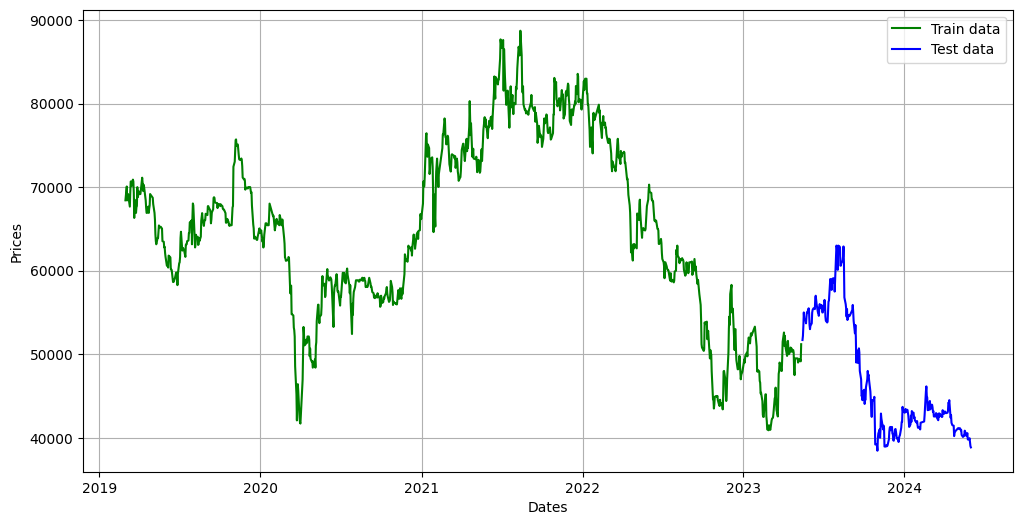

In [120]:
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(train_data['Price'], 'green', label='Train data')
plt.plot(test_data['Price'], 'blue', label='Test data')
plt.legend()

In [121]:
model = ExponentialSmoothing(train_data['Price'].values,trend='mul', seasonal='mul', seasonal_periods=4).fit()

c:\Users\minhc\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [122]:
predictions = model.forecast(test_size)
test_pred = predictions[:test_size]

In [123]:
test_data['Price Predicted'] = test_pred

C:\Users\minhc\AppData\Local\Temp\ipykernel_15796\2966731002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Price Predicted'] = test_pred


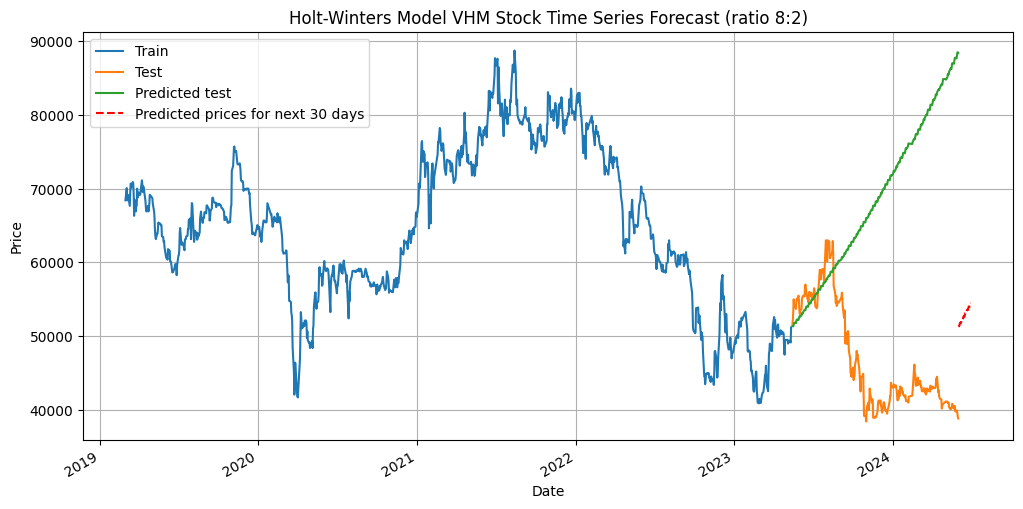

In [124]:
train_data['Price'].plot(legend=True, label='Train', figsize=(12,6))
test_data['Price'].plot(legend=True, label='Test')
test_data['Price Predicted'].plot(legend=True, label='Predicted test')

# Predict prices for the next 30 days
# Generate a range of dates for the next 30 days
next_30_days = pd.to_datetime(pd.date_range(start=data.index[-1], periods=30), format='%m/%d/%Y')

# Convert the date range to a NumPy array if needed for your prediction model
x_next_30_days = np.array(next_30_days).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.forecast(len(x_next_30_days))
plt.plot(next_30_days, y_next_30_days, linestyle='--', color='r', label='Predicted prices for next 30 days')
x_next_30_days

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Holt-Winters Model VHM Stock Time Series Forecast (ratio 8:2)')
plt.legend()
plt.grid(True)
plt.show()

In [125]:
# Calculate RMSE
test_rmse = np.sqrt(mean_squared_error(test_data['Price'], test_data['Price Predicted']))

# Calculate MAPE
test_mape = mean_absolute_percentage_error(test_data['Price'], test_data['Price Predicted'])

# Calculate MAE
test_mae = mean_absolute_error(test_data['Price'], test_data['Price Predicted'])

print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)


Testing RMSE: 27127.60299829756
Testing MAPE: 0.5241730656905937
Testing MAE: 22208.71170694317


#### Ratio 9:1

In [126]:
train_size = round(len(df) * 0.9)
test_size = round(len(df) * 0.1) 

len(df), train_size, test_size

(1313, 1182, 131)

In [127]:
train_data = df[:train_size]
test_data = df[train_size:]

train_data.shape, test_data.shape

((1182, 6), (131, 6))

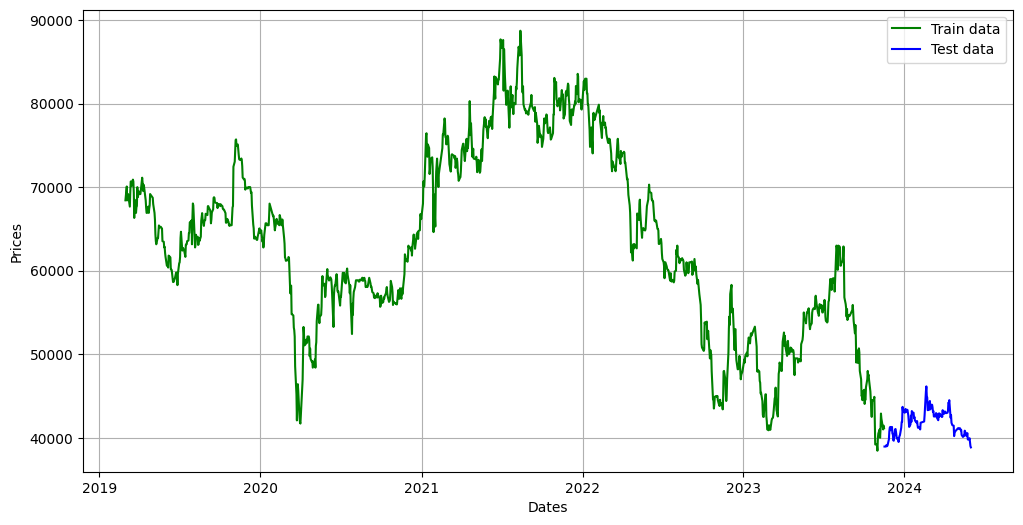

In [128]:
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(train_data['Price'], 'green', label='Train data')
plt.plot(test_data['Price'], 'blue', label='Test data')
plt.legend()

In [129]:
model = ExponentialSmoothing(train_data['Price'].values,trend='mul', seasonal='mul', seasonal_periods=4).fit()

c:\Users\minhc\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [130]:
predictions = model.forecast(test_size)
test_pred = predictions[:test_size]

In [131]:
test_data['Price Predicted'] = test_pred

C:\Users\minhc\AppData\Local\Temp\ipykernel_15796\2966731002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Price Predicted'] = test_pred


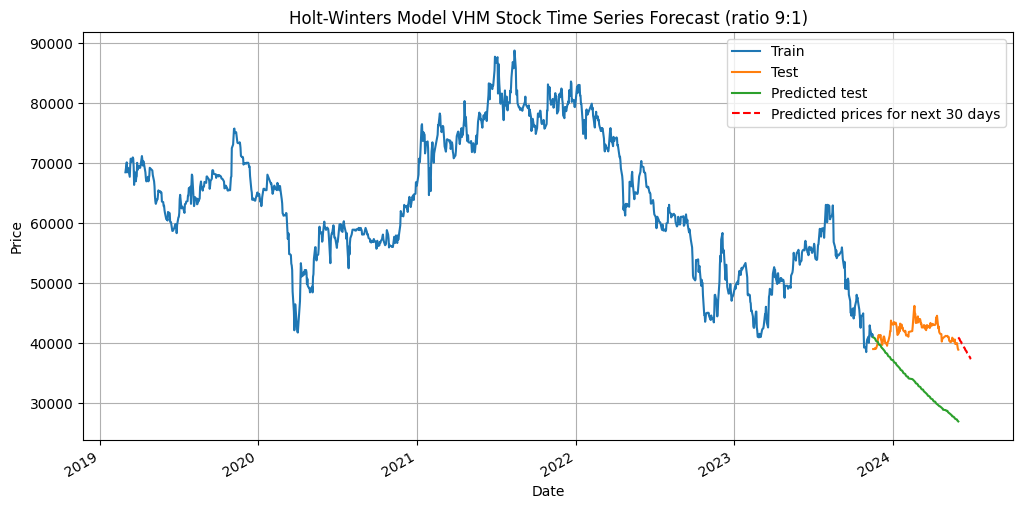

In [132]:
train_data['Price'].plot(legend=True, label='Train', figsize=(12,6))
test_data['Price'].plot(legend=True, label='Test')
test_data['Price Predicted'].plot(legend=True, label='Predicted test')

# Predict prices for the next 30 days
# Generate a range of dates for the next 30 days
next_30_days = pd.to_datetime(pd.date_range(start=data.index[-1], periods=30), format='%m/%d/%Y')

# Convert the date range to a NumPy array if needed for your prediction model
x_next_30_days = np.array(next_30_days).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.forecast(len(x_next_30_days))
plt.plot(next_30_days, y_next_30_days, linestyle='--', color='r', label='Predicted prices for next 30 days')
x_next_30_days

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Holt-Winters Model VHM Stock Time Series Forecast (ratio 9:1)')
plt.legend()
plt.grid(True)
plt.show()

In [133]:
# Calculate RMSE
test_rmse = np.sqrt(mean_squared_error(test_data['Price'], test_data['Price Predicted']))

# Calculate MAPE
test_mape = mean_absolute_percentage_error(test_data['Price'], test_data['Price Predicted'])

# Calculate MAE
test_mae = mean_absolute_error(test_data['Price'], test_data['Price Predicted'])

print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)


Testing RMSE: 9511.217335148243
Testing MAPE: 0.20230779158314766
Testing MAE: 8508.93926807417


### Dataset: NVL Historical Data

In [134]:
data = pd.read_csv('../Datasets/2 - NVL Historical Data.csv')
data = data.dropna()

data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')
data = data.set_index('Date')
data = data.sort_index()

# Format column "Price", "Open", "High", "Low"
for col in ['Price', 'Open', 'High', 'Low']:
    data[col] = data[col].str.replace(',', '').astype(float)

data
df = data


#### Ratio 7:3

In [135]:
train_size = round(len(df) * 0.7)
test_size = round(len(df) * 0.3) 

len(df), train_size, test_size

(1313, 919, 394)

In [136]:
train_data = df[:train_size]
test_data = df[train_size:]

train_data.shape, test_data.shape

((919, 6), (394, 6))

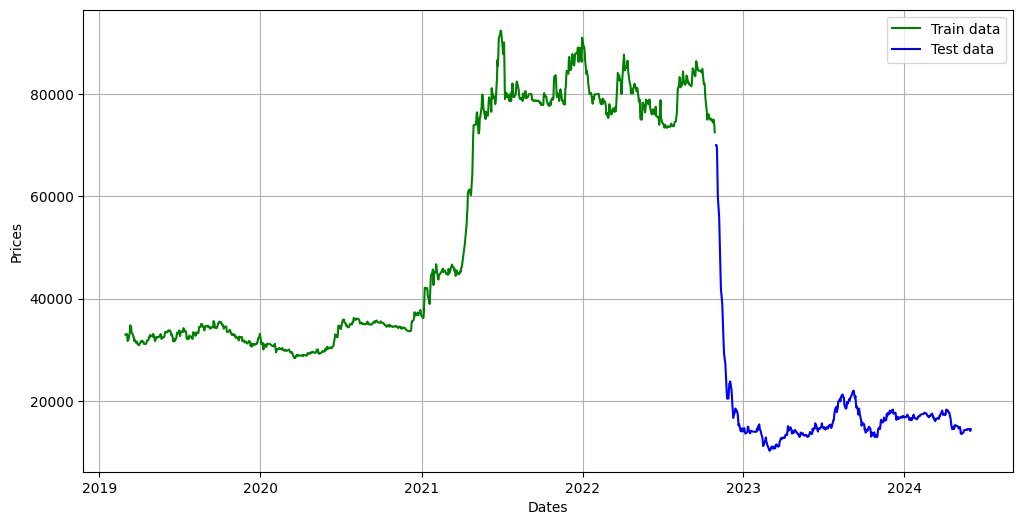

In [137]:
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(train_data['Price'], 'green', label='Train data')
plt.plot(test_data['Price'], 'blue', label='Test data')
plt.legend()

In [138]:
model = ExponentialSmoothing(train_data['Price'].values,trend='mul', seasonal='mul', seasonal_periods=4).fit()

c:\Users\minhc\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [139]:
predictions = model.forecast(test_size)
test_pred = predictions[:test_size]

In [140]:
test_data['Price Predicted'] = test_pred

C:\Users\minhc\AppData\Local\Temp\ipykernel_15796\2966731002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Price Predicted'] = test_pred


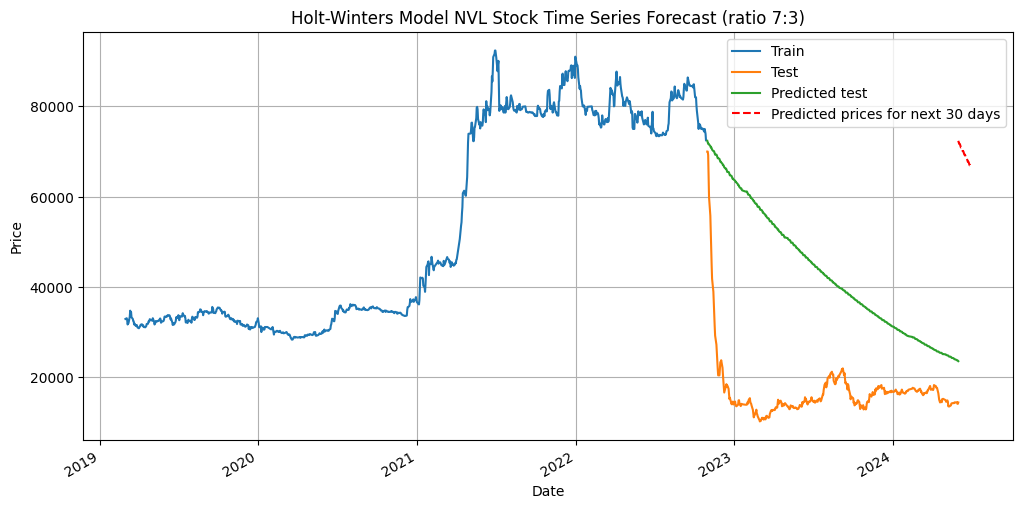

In [141]:
train_data['Price'].plot(legend=True, label='Train', figsize=(12,6))
test_data['Price'].plot(legend=True, label='Test')
test_data['Price Predicted'].plot(legend=True, label='Predicted test')

# Predict prices for the next 30 days
# Generate a range of dates for the next 30 days
next_30_days = pd.to_datetime(pd.date_range(start=data.index[-1], periods=30), format='%m/%d/%Y')

# Convert the date range to a NumPy array if needed for your prediction model
x_next_30_days = np.array(next_30_days).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.forecast(len(x_next_30_days))
plt.plot(next_30_days, y_next_30_days, linestyle='--', color='r', label='Predicted prices for next 30 days')
x_next_30_days

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Holt-Winters Model NVL Stock Time Series Forecast (ratio 7:3)')
plt.legend()
plt.grid(True)
plt.show()

In [142]:
# Calculate RMSE
test_rmse = np.sqrt(mean_squared_error(test_data['Price'], test_data['Price Predicted']))

# Calculate MAPE
test_mape = mean_absolute_percentage_error(test_data['Price'], test_data['Price Predicted'])

# Calculate MAE
test_mae = mean_absolute_error(test_data['Price'], test_data['Price Predicted'])

print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)


Testing RMSE: 29857.9243112184
Testing MAPE: 1.7632636524713377
Testing MAE: 26475.411462948727


#### Ratio 8:2

In [143]:
train_size = round(len(df) * 0.8)
test_size = round(len(df) * 0.2) 

len(df), train_size, test_size

(1313, 1050, 263)

In [144]:
train_data = df[:train_size]
test_data = df[train_size:]

train_data.shape, test_data.shape

((1050, 6), (263, 6))

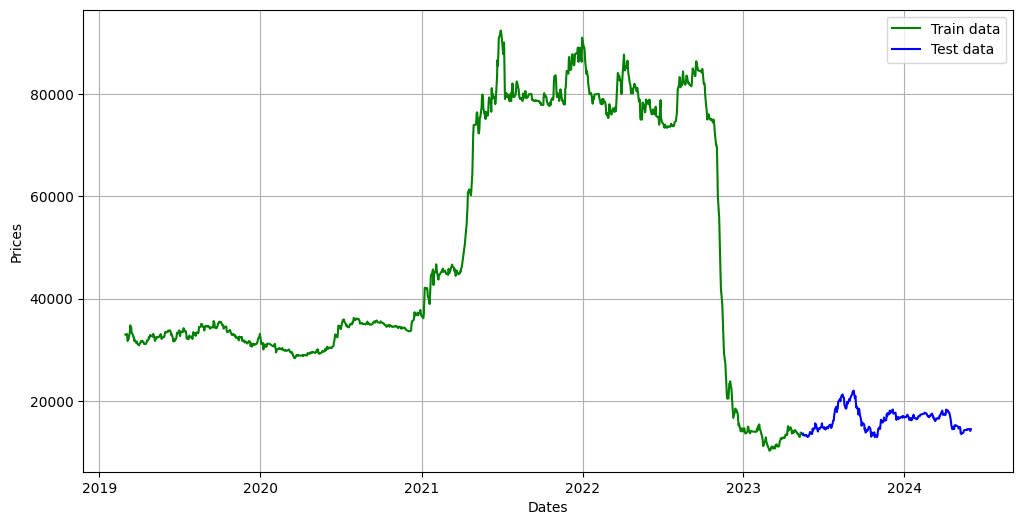

In [145]:
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(train_data['Price'], 'green', label='Train data')
plt.plot(test_data['Price'], 'blue', label='Test data')
plt.legend()

In [146]:
model = ExponentialSmoothing(train_data['Price'].values,trend='mul', seasonal='mul', seasonal_periods=4).fit()

c:\Users\minhc\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [147]:
predictions = model.forecast(test_size)
test_pred = predictions[:test_size]

In [148]:
test_data['Price Predicted'] = test_pred

C:\Users\minhc\AppData\Local\Temp\ipykernel_15796\2966731002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Price Predicted'] = test_pred


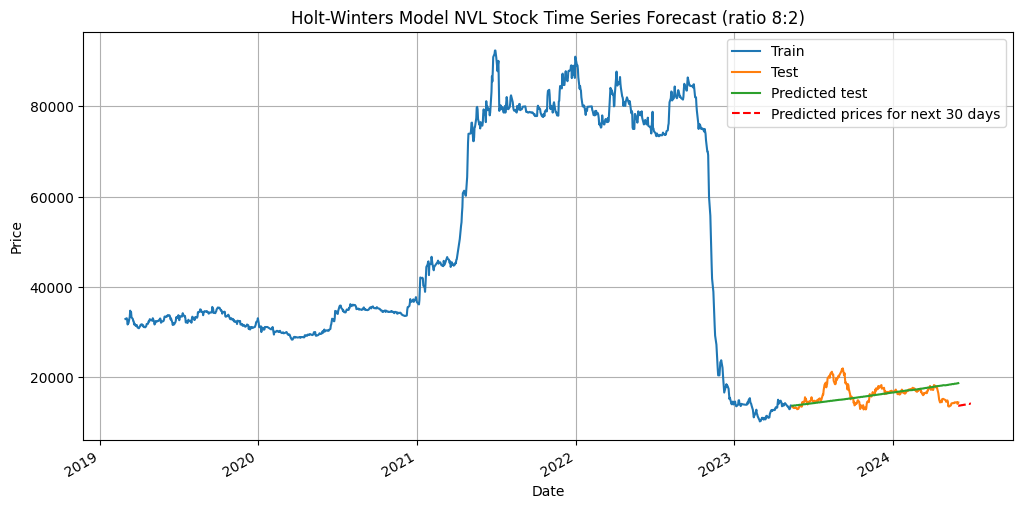

In [149]:
train_data['Price'].plot(legend=True, label='Train', figsize=(12,6))
test_data['Price'].plot(legend=True, label='Test')
test_data['Price Predicted'].plot(legend=True, label='Predicted test')

# Predict prices for the next 30 days
# Generate a range of dates for the next 30 days
next_30_days = pd.to_datetime(pd.date_range(start=data.index[-1], periods=30), format='%m/%d/%Y')

# Convert the date range to a NumPy array if needed for your prediction model
x_next_30_days = np.array(next_30_days).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.forecast(len(x_next_30_days))
plt.plot(next_30_days, y_next_30_days, linestyle='--', color='r', label='Predicted prices for next 30 days')
x_next_30_days

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Holt-Winters Model NVL Stock Time Series Forecast (ratio 8:2)')
plt.legend()
plt.grid(True)
plt.show()

In [150]:
# Calculate RMSE
test_rmse = np.sqrt(mean_squared_error(test_data['Price'], test_data['Price Predicted']))

# Calculate MAPE
test_mape = mean_absolute_percentage_error(test_data['Price'], test_data['Price Predicted'])

# Calculate MAE
test_mae = mean_absolute_error(test_data['Price'], test_data['Price Predicted'])

print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)


Testing RMSE: 2465.433699908925
Testing MAPE: 0.10143679766772225
Testing MAE: 1686.7102895601083


#### Ratio 9:1

In [151]:
train_size = round(len(df) * 0.9)
test_size = round(len(df) * 0.1) 

len(df), train_size, test_size

(1313, 1182, 131)

In [152]:
train_data = df[:train_size]
test_data = df[train_size:]

train_data.shape, test_data.shape

((1182, 6), (131, 6))

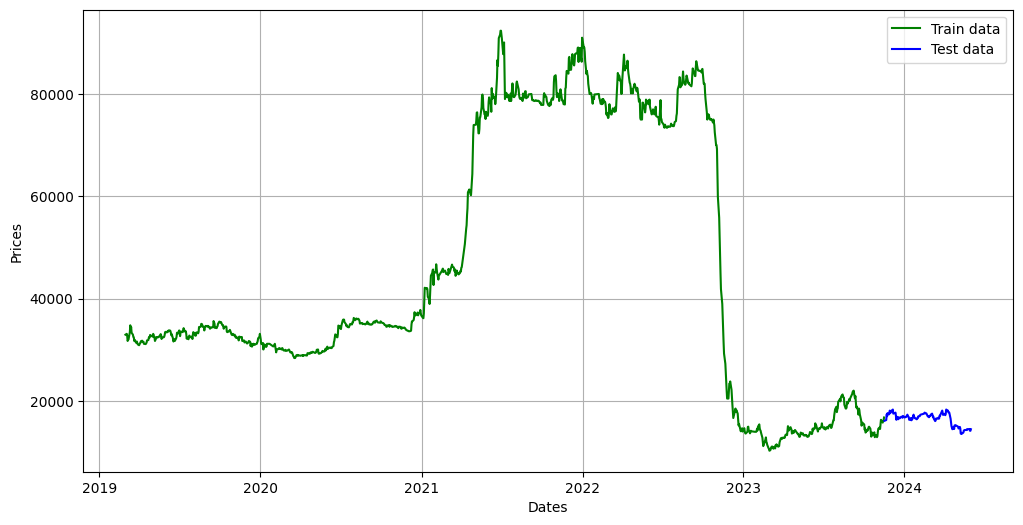

In [153]:
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(train_data['Price'], 'green', label='Train data')
plt.plot(test_data['Price'], 'blue', label='Test data')
plt.legend()

In [154]:
model = ExponentialSmoothing(train_data['Price'].values,trend='mul', seasonal='mul', seasonal_periods=4).fit()

c:\Users\minhc\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [155]:
predictions = model.forecast(test_size)
test_pred = predictions[:test_size]

In [156]:
test_data['Price Predicted'] = test_pred

C:\Users\minhc\AppData\Local\Temp\ipykernel_15796\2966731002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Price Predicted'] = test_pred


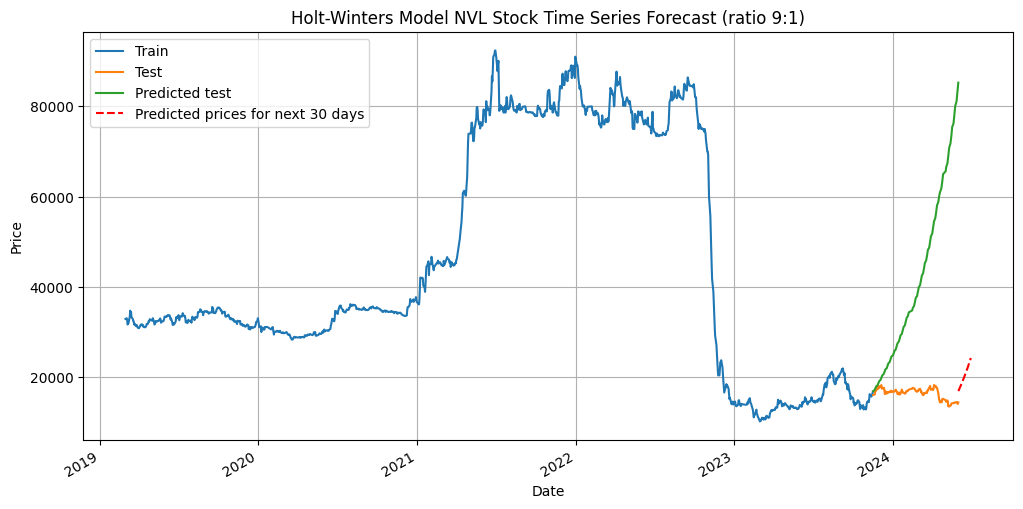

In [157]:
train_data['Price'].plot(legend=True, label='Train', figsize=(12,6))
test_data['Price'].plot(legend=True, label='Test')
test_data['Price Predicted'].plot(legend=True, label='Predicted test')

# Predict prices for the next 30 days
# Generate a range of dates for the next 30 days
next_30_days = pd.to_datetime(pd.date_range(start=data.index[-1], periods=30), format='%m/%d/%Y')

# Convert the date range to a NumPy array if needed for your prediction model
x_next_30_days = np.array(next_30_days).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.forecast(len(x_next_30_days))
plt.plot(next_30_days, y_next_30_days, linestyle='--', color='r', label='Predicted prices for next 30 days')
x_next_30_days

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Holt-Winters Model NVL Stock Time Series Forecast (ratio 9:1)')
plt.legend()
plt.grid(True)
plt.show()

In [158]:
# Calculate RMSE
test_rmse = np.sqrt(mean_squared_error(test_data['Price'], test_data['Price Predicted']))

# Calculate MAPE
test_mape = mean_absolute_percentage_error(test_data['Price'], test_data['Price Predicted'])

# Calculate MAE
test_mae = mean_absolute_error(test_data['Price'], test_data['Price Predicted'])

print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)


Testing RMSE: 32961.76025487705
Testing MAPE: 1.656855078615222
Testing MAE: 25900.53531240472


### Dataset: NLG Historical Data

In [159]:
data = pd.read_csv('../Datasets/3 - NLG Historical Data.csv')
data = data.dropna()

data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')
data = data.set_index('Date')
data = data.sort_index()

# Format column "Price", "Open", "High", "Low"
for col in ['Price', 'Open', 'High', 'Low']:
    data[col] = data[col].str.replace(',', '').astype(float)

data
df = data


#### Ratio 7:3

In [160]:
train_size = round(len(df) * 0.7)
test_size = round(len(df) * 0.3) 

len(df), train_size, test_size

(1313, 919, 394)

In [161]:
train_data = df[:train_size]
test_data = df[train_size:]

train_data.shape, test_data.shape

((919, 6), (394, 6))

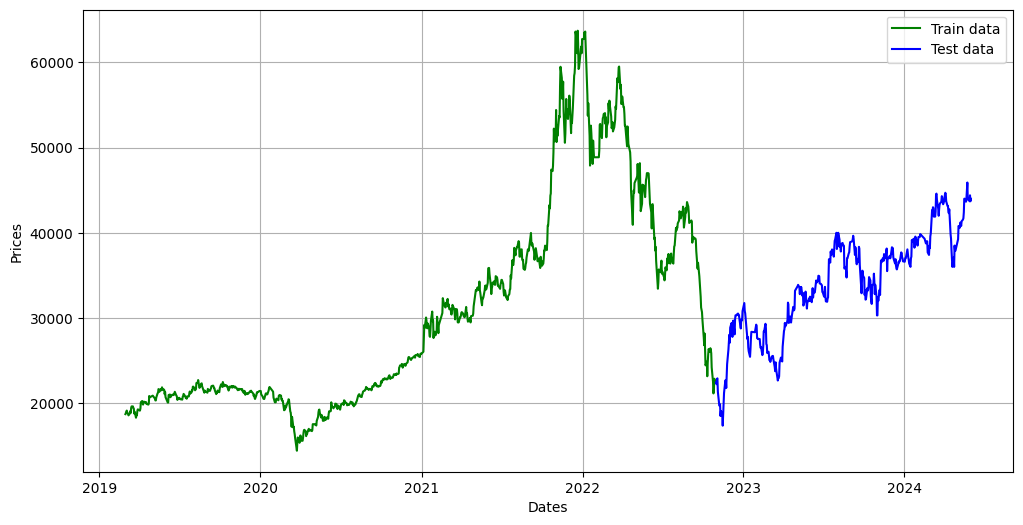

In [162]:
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(train_data['Price'], 'green', label='Train data')
plt.plot(test_data['Price'], 'blue', label='Test data')
plt.legend()

In [163]:
model = ExponentialSmoothing(train_data['Price'].values,trend='mul', seasonal='mul', seasonal_periods=4).fit()

c:\Users\minhc\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [164]:
predictions = model.forecast(test_size)
test_pred = predictions[:test_size]

In [165]:
test_data['Price Predicted'] = test_pred

C:\Users\minhc\AppData\Local\Temp\ipykernel_15796\2966731002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Price Predicted'] = test_pred


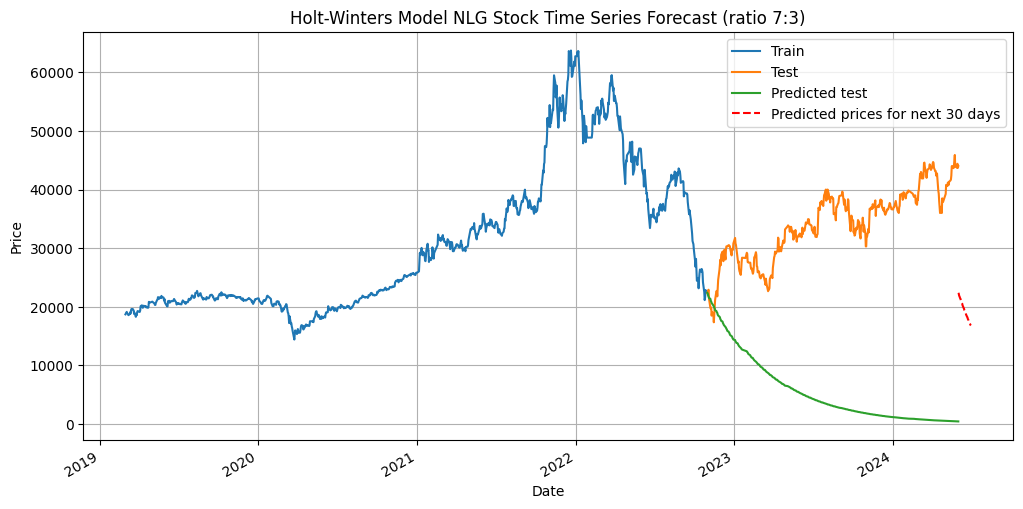

In [166]:
train_data['Price'].plot(legend=True, label='Train', figsize=(12,6))
test_data['Price'].plot(legend=True, label='Test')
test_data['Price Predicted'].plot(legend=True, label='Predicted test')

# Predict prices for the next 30 days
# Generate a range of dates for the next 30 days
next_30_days = pd.to_datetime(pd.date_range(start=data.index[-1], periods=30), format='%m/%d/%Y')

# Convert the date range to a NumPy array if needed for your prediction model
x_next_30_days = np.array(next_30_days).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.forecast(len(x_next_30_days))
plt.plot(next_30_days, y_next_30_days, linestyle='--', color='r', label='Predicted prices for next 30 days')
x_next_30_days

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Holt-Winters Model NLG Stock Time Series Forecast (ratio 7:3)')
plt.legend()
plt.grid(True)
plt.show()

In [167]:
# Calculate RMSE
test_rmse = np.sqrt(mean_squared_error(test_data['Price'], test_data['Price Predicted']))

# Calculate MAPE
test_mape = mean_absolute_percentage_error(test_data['Price'], test_data['Price Predicted'])

# Calculate MAE
test_mae = mean_absolute_error(test_data['Price'], test_data['Price Predicted'])

print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)


Testing RMSE: 30596.066113002504
Testing MAPE: 0.8014786555145339
Testing MAE: 28482.92391906418


#### Ratio 8:2

In [168]:
train_size = round(len(df) * 0.8)
test_size = round(len(df) * 0.2) 

len(df), train_size, test_size

(1313, 1050, 263)

In [169]:
train_data = df[:train_size]
test_data = df[train_size:]

train_data.shape, test_data.shape

((1050, 6), (263, 6))

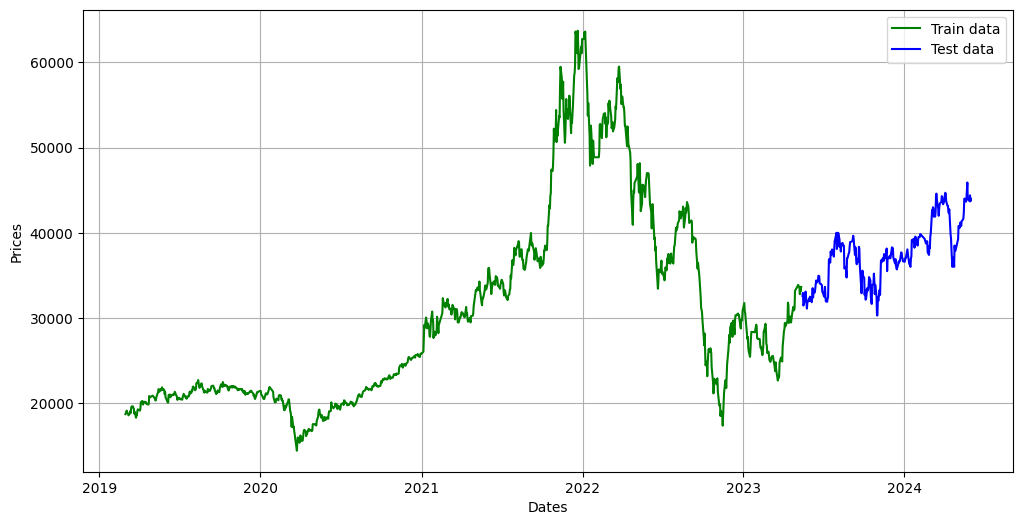

In [170]:
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(train_data['Price'], 'green', label='Train data')
plt.plot(test_data['Price'], 'blue', label='Test data')
plt.legend()

In [171]:
model = ExponentialSmoothing(train_data['Price'].values,trend='mul', seasonal='mul', seasonal_periods=4).fit()

c:\Users\minhc\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [172]:
predictions = model.forecast(test_size)
test_pred = predictions[:test_size]

In [173]:
test_data['Price Predicted'] = test_pred

C:\Users\minhc\AppData\Local\Temp\ipykernel_15796\2966731002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Price Predicted'] = test_pred


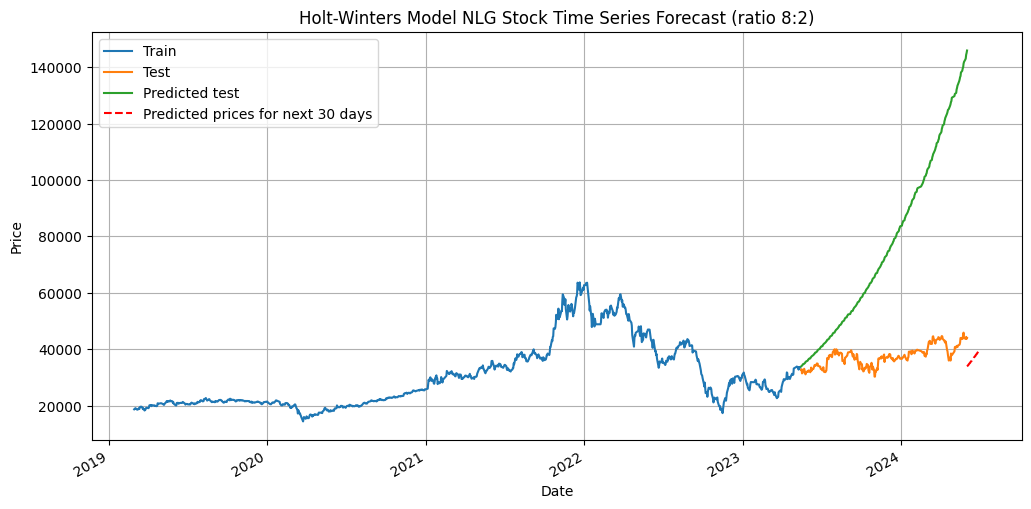

In [174]:
train_data['Price'].plot(legend=True, label='Train', figsize=(12,6))
test_data['Price'].plot(legend=True, label='Test')
test_data['Price Predicted'].plot(legend=True, label='Predicted test')

# Predict prices for the next 30 days
# Generate a range of dates for the next 30 days
next_30_days = pd.to_datetime(pd.date_range(start=data.index[-1], periods=30), format='%m/%d/%Y')

# Convert the date range to a NumPy array if needed for your prediction model
x_next_30_days = np.array(next_30_days).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.forecast(len(x_next_30_days))
plt.plot(next_30_days, y_next_30_days, linestyle='--', color='r', label='Predicted prices for next 30 days')
x_next_30_days

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Holt-Winters Model NLG Stock Time Series Forecast (ratio 8:2)')
plt.legend()
plt.grid(True)
plt.show()

In [175]:
# Calculate RMSE
test_rmse = np.sqrt(mean_squared_error(test_data['Price'], test_data['Price Predicted']))

# Calculate MAPE
test_mape = mean_absolute_percentage_error(test_data['Price'], test_data['Price Predicted'])

# Calculate MAE
test_mae = mean_absolute_error(test_data['Price'], test_data['Price Predicted'])

print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)


Testing RMSE: 48969.03850201711
Testing MAPE: 1.0065331058562468
Testing MAE: 39320.86790499477


#### Ratio 9:1

In [176]:
train_size = round(len(df) * 0.9)
test_size = round(len(df) * 0.1) 

len(df), train_size, test_size

(1313, 1182, 131)

In [177]:
train_data = df[:train_size]
test_data = df[train_size:]

train_data.shape, test_data.shape

((1182, 6), (131, 6))

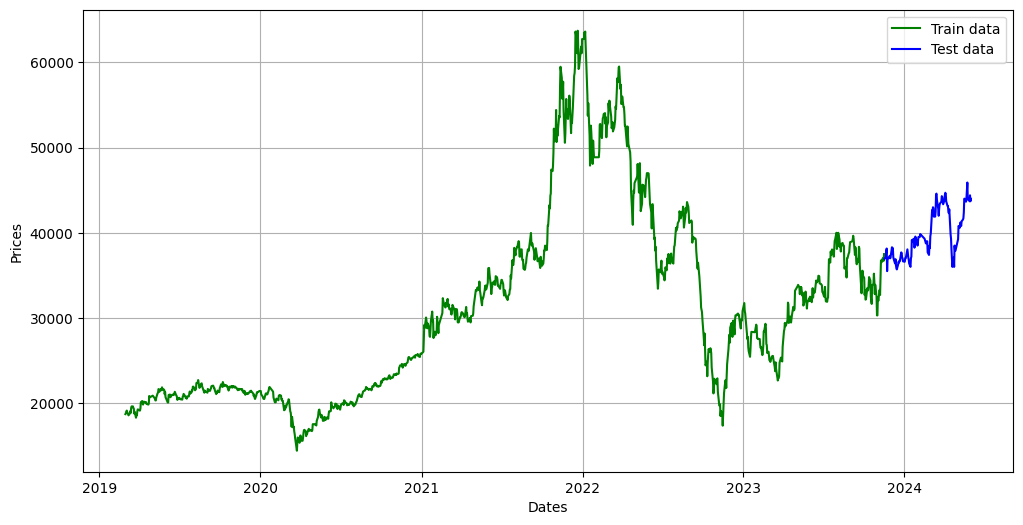

In [178]:
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(train_data['Price'], 'green', label='Train data')
plt.plot(test_data['Price'], 'blue', label='Test data')
plt.legend()

In [179]:
model = ExponentialSmoothing(train_data['Price'].values,trend='mul', seasonal='mul', seasonal_periods=4).fit()

c:\Users\minhc\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [180]:
predictions = model.forecast(test_size)
test_pred = predictions[:test_size]

In [181]:
test_data['Price Predicted'] = test_pred

C:\Users\minhc\AppData\Local\Temp\ipykernel_15796\2966731002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Price Predicted'] = test_pred


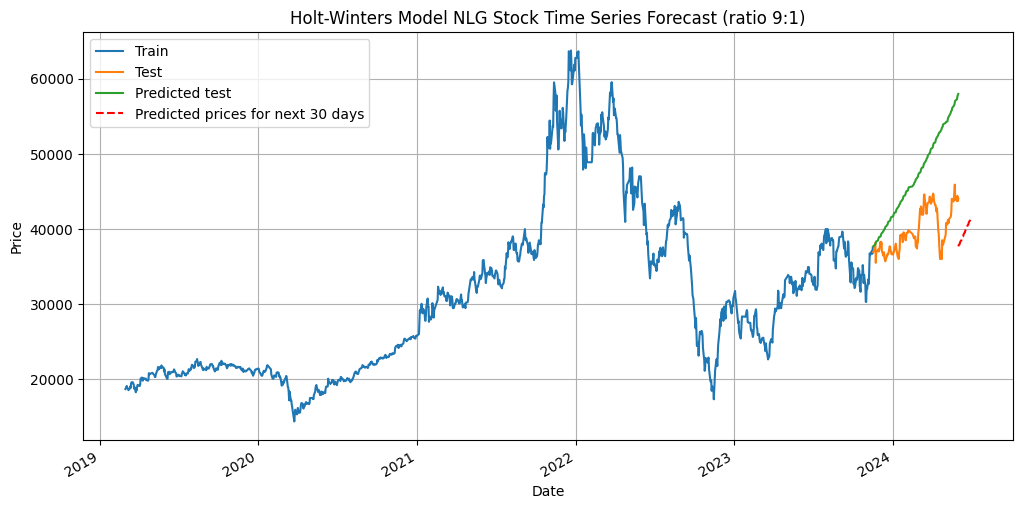

In [182]:
train_data['Price'].plot(legend=True, label='Train', figsize=(12,6))
test_data['Price'].plot(legend=True, label='Test')
test_data['Price Predicted'].plot(legend=True, label='Predicted test')

# Predict prices for the next 30 days
# Generate a range of dates for the next 30 days
next_30_days = pd.to_datetime(pd.date_range(start=data.index[-1], periods=30), format='%m/%d/%Y')

# Convert the date range to a NumPy array if needed for your prediction model
x_next_30_days = np.array(next_30_days).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.forecast(len(x_next_30_days))
plt.plot(next_30_days, y_next_30_days, linestyle='--', color='r', label='Predicted prices for next 30 days')
x_next_30_days

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Holt-Winters Model NLG Stock Time Series Forecast (ratio 9:1)')
plt.legend()
plt.grid(True)
plt.show()

In [183]:
# Calculate RMSE
test_rmse = np.sqrt(mean_squared_error(test_data['Price'], test_data['Price Predicted']))

# Calculate MAPE
test_mape = mean_absolute_percentage_error(test_data['Price'], test_data['Price Predicted'])

# Calculate MAE
test_mae = mean_absolute_error(test_data['Price'], test_data['Price Predicted'])

print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)


Testing RMSE: 8355.522700635347
Testing MAPE: 0.17918037350935037
Testing MAE: 7215.484427931033
